In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from scipy import integrate
import astropy.io.fits as fits 
import pandas as pd

In [2]:
import astropy.io.fits as fits 

hdu=fits.open('aJ_asky_991004n0440185.fits')
data=hdu[0].data
header=hdu[0].header

print (data[294, 458])  # pixel 行、列值减一（pyhton list index 从零开始）
print (data[236, 460])
print (data[113, 124])

456.31006
294.21515
197.79608


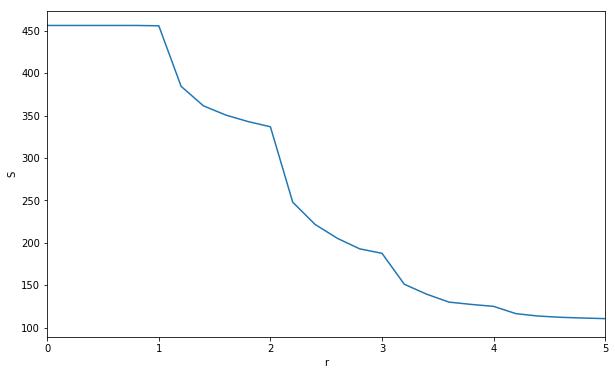

In [3]:
# 第一个源

center = [294, 458]
S = [data[294, 458]]
r = [0]

R = 10  # 最大半径
N = 50 # 半径取值个数
k = 1000 # 角度取值个数
for i in range(1, N):
    r_new = i*R/N
    r.append(r_new)
    x_new = int(r_new)
    y_new = 0
    theta_ini = 0
    S_new = 0
    for j in range(0, k+1):
        theta = j*2*np.pi/k
        if int(r_new*np.cos(theta)) != x_new:
            def data_func_theta(theta):
                return r_new * data[center[0]+x_new, center[1]+y_new]
            S_new += integrate.quad(data_func_theta, theta_ini, theta)[0]
            x_new = int(r_new*np.cos(theta))
            theta_ini = theta
        elif int(r_new*np.sin(theta)) != y_new:
            def data_func_theta(theta):
                return r_new * data[center[0]+x_new, center[1]+y_new]
            S_new += integrate.quad(data_func_theta, theta_ini, theta)[0]
            y_new = int(r_new*np.sin(theta))
            theta_ini = theta
        elif j == k:
            def data_func_theta(theta):
                return r_new * data[center[0]+x_new, center[1]+y_new]
            S_new += integrate.quad(data_func_theta, theta_ini, theta)[0]
        else:
            continue
    S.append(S_new/(2*np.pi*r_new))
    
fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(111)
ax.plot(r, S)
ax.set_xlabel('r')
ax.set_ylabel('S')
ax.set_xlim(0,5)
plt.show()